In [9]:
import pandas as pd # for data manipulation
import numpy as np  # for numerical computing
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization
import warnings # to clear warnings
warnings.filterwarnings("ignore")

In [10]:
# load the dataset
data = pd.read_excel('/content/Bankruptcy Prediction.xlsx')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [11]:
# Cleans column names by removing special characters, spaces, and brackets
data.columns = data.columns.str.strip().str.replace(r'[^\w\s]', '', regex=True)

In [12]:
data.shape

(6819, 96)

In [13]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Bankrupt                                               6819 non-null   int64  
 1   ROAC before interest and depreciation before interest  6819 non-null   float64
 2   ROAA before interest and  after tax                    6819 non-null   float64
 3   ROAB before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                 6819 non-null   float64
 5   Realized Sales Gross Margin                            6819 non-null   float64
 6   Operating Profit Rate                                  6819 non-null   float64
 7   Pretax net Interest Rate                               6819 non-null   float64
 8   Aftertax net Interest Rate                      

In [14]:
data.dtypes.value_counts()

,count
float64,93
int64,3


In [15]:
# Summary statistics for numerical features
data.describe()

,Bankrupt,ROAC before interest and depreciation before interest,ROAA before interest and after tax,ROAB before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pretax net Interest Rate,Aftertax net Interest Rate,Nonindustry income and expenditurerevenue,...,Net Income to Total Assets,Total assets to GNP price,Nocredit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage DFL,Interest Coverage Ratio Interest expense to EBIT,Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Initial Observations:

  - Number of Rows:6819
  - Number of Columns:96
  - the dataset consists of both integer and continous data inputs, and the target variable is a integer type(representing the Bankrupt)
  - Missing Values: There is no missing value in dataset
  - Data Types: The dataset contains a mix of integer and float data types, all of which seem appropriate.

In [16]:
# Checking duplicate values
data.duplicated().sum()

0

In [17]:
# Calculate skewness values
data.skew()

,0
Bankrupt,5.295388
ROAC before interest and depreciation before interest,-0.323941
ROAA before interest and after tax,-1.033727
ROAB before interest and depreciation after tax,-0.763564
Operating Gross Margin,-8.043368
...,...
Liability to Equity,27.459467
Degree of Financial Leverage DFL,45.724197
Interest Coverage Ratio Interest expense to EBIT,-13.939528
Net Income Flag,0.000000


In [18]:
data['Bankrupt'].value_counts()

,count
Bankrupt,
0,6599
1,220


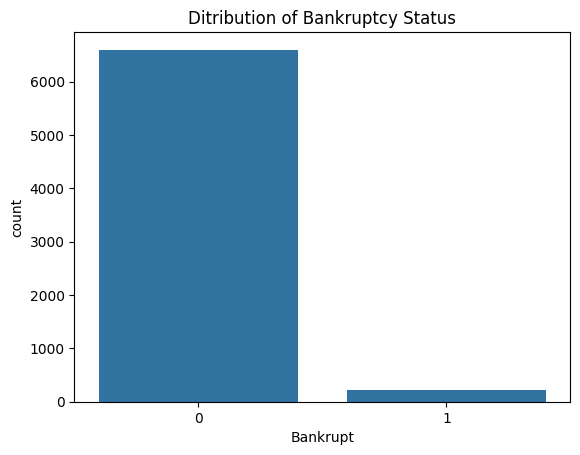

In [19]:
# plot distribution of a feature
sns.countplot(x='Bankrupt', data=data)
plt.title('Ditribution of Bankruptcy Status')
plt.show()

In [20]:
print('Percentage of bankrupt companies:',(220/6819)*100)
print('Percentage of non-bankrupt companies:',(6599/6819)*100)

Percentage of bankrupt companies: 3.2262795131250916
Percentage of non-bankrupt companies: 96.77372048687491


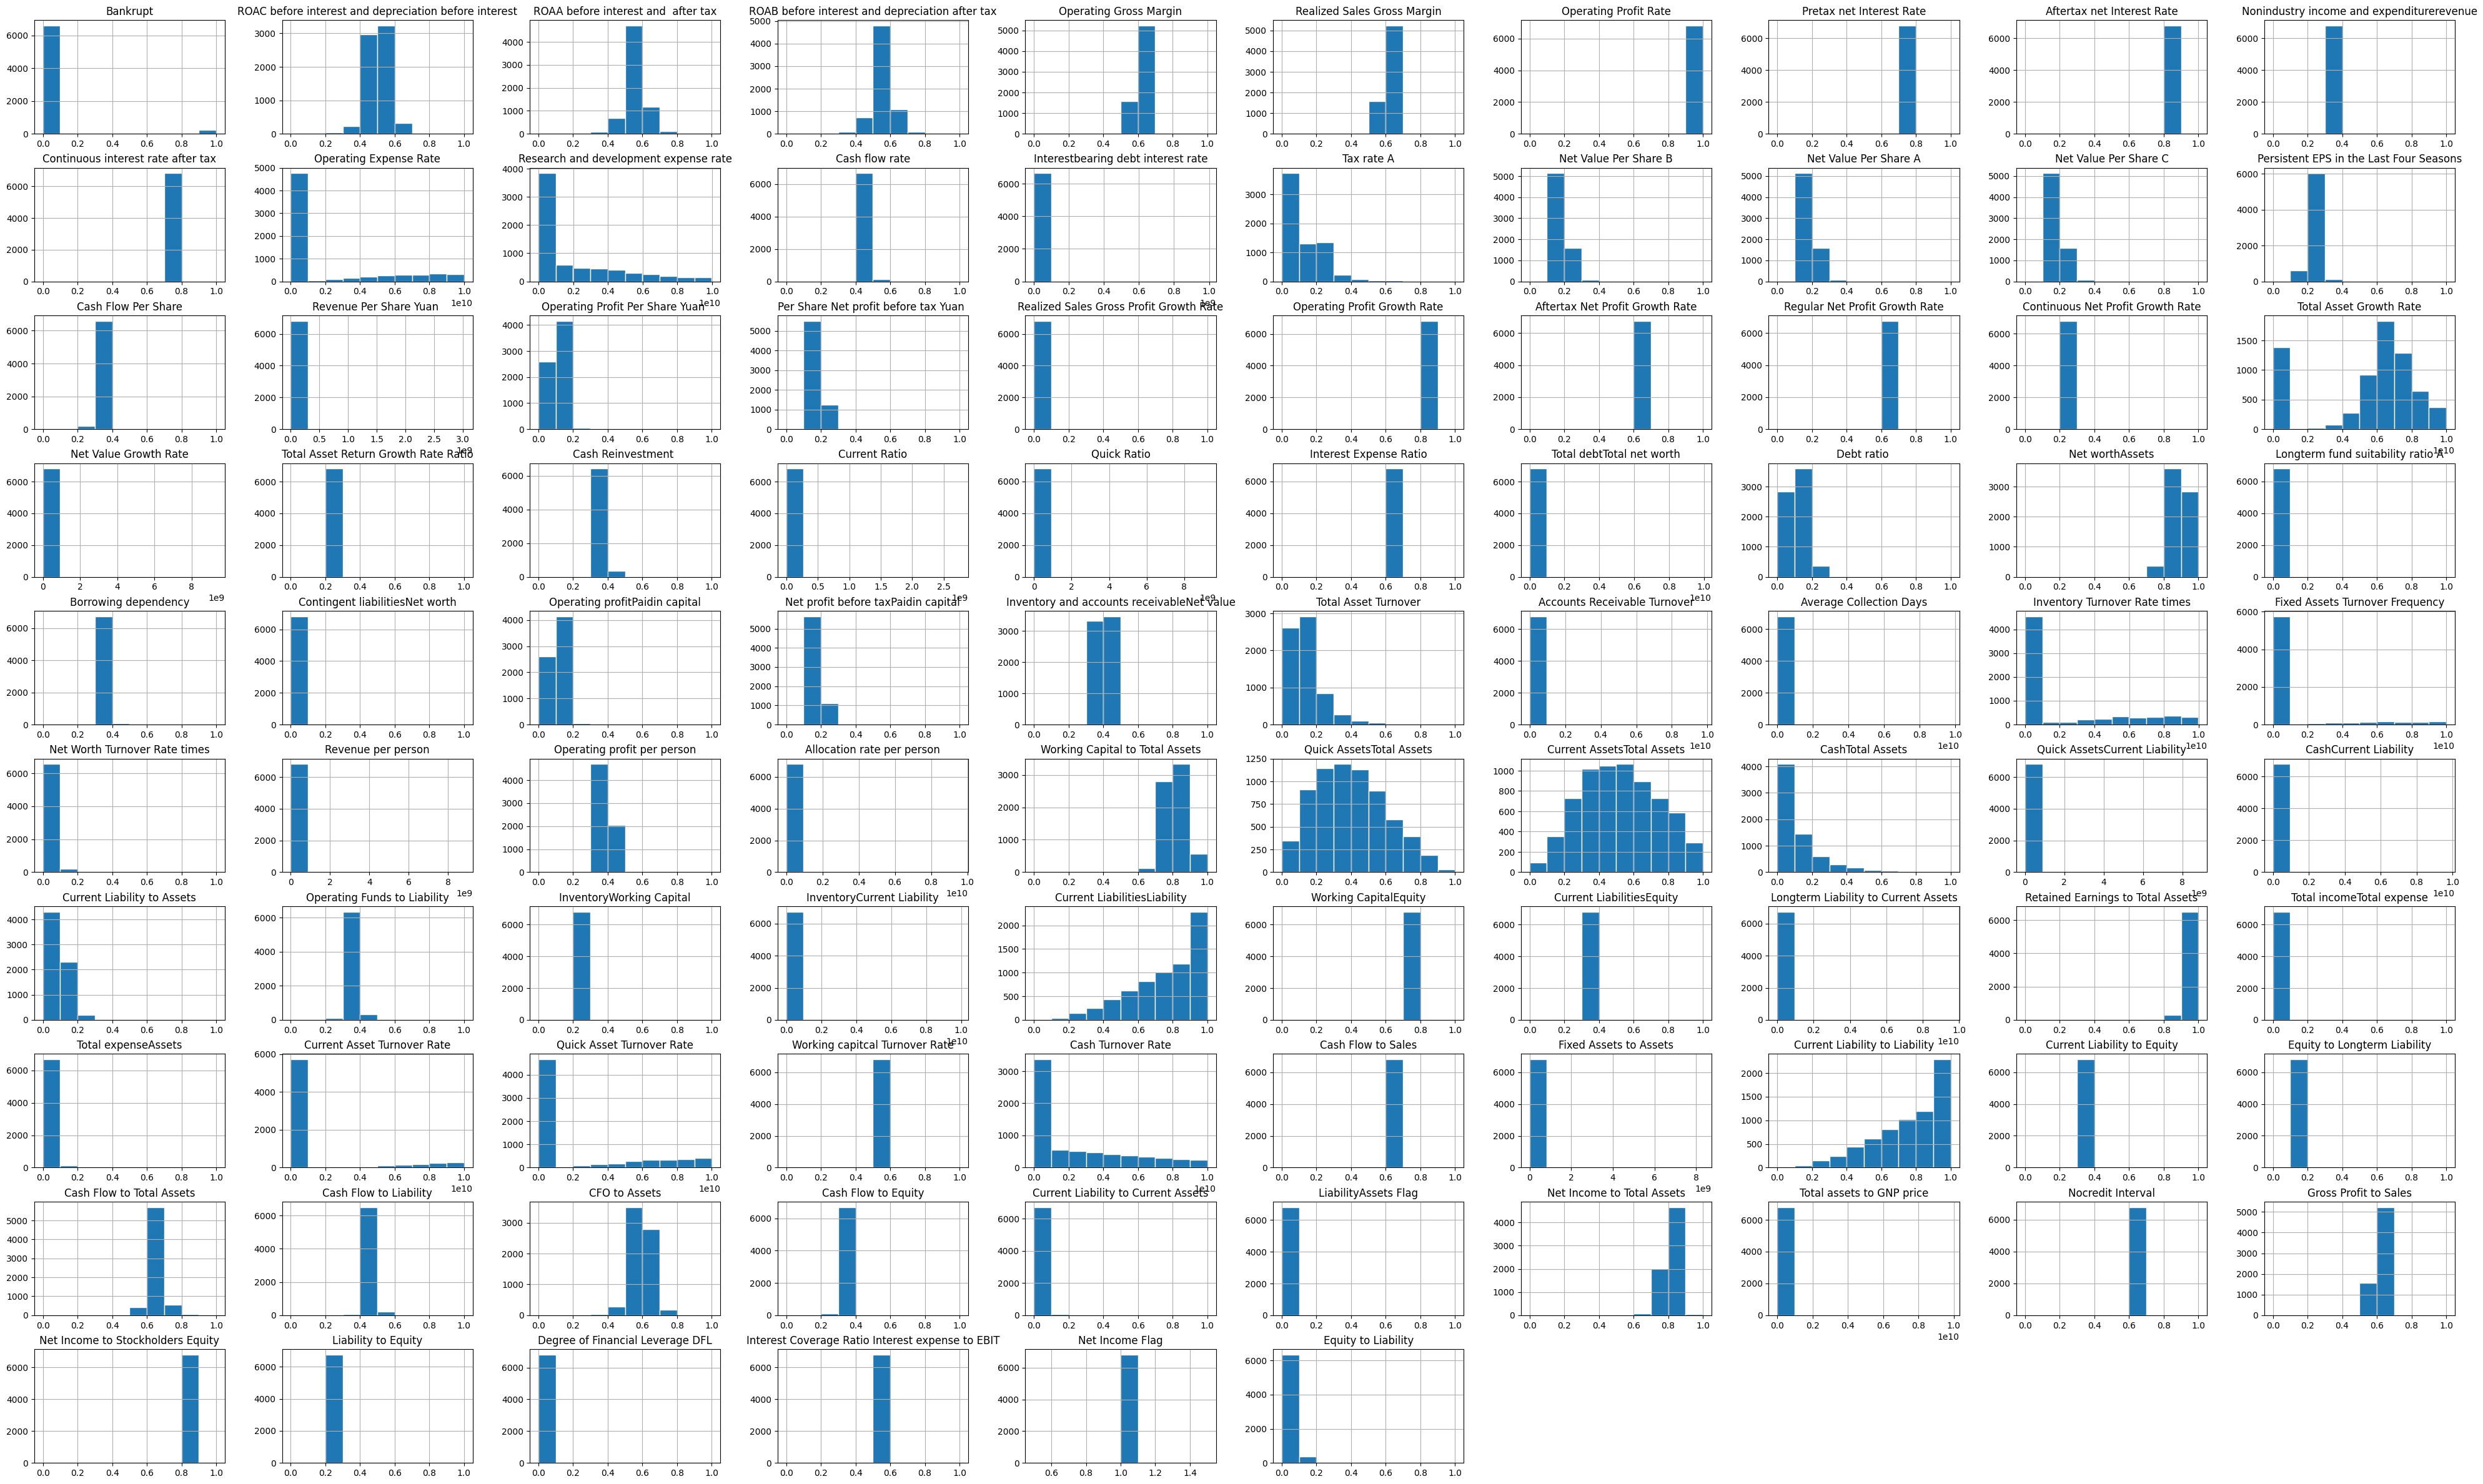

In [21]:
data.hist(figsize=(50,30), edgecolor='white')
plt.show()

In [22]:
# calculate the correlation coefficient
corr_matrix = data.corr()

bankrupt_corr = corr_matrix['Bankrupt'].drop('Bankrupt')

# set a correlation threshold
corr_threshold = 0.2

# select variables with correlation above the threshold
selected_var = bankrupt_corr[abs(bankrupt_corr)>corr_threshold]
selected_var

,Bankrupt
ROAC before interest and depreciation before interest,-0.260807
ROAA before interest and after tax,-0.282941
ROAB before interest and depreciation after tax,-0.273051
Persistent EPS in the Last Four Seasons,-0.219560
Per Share Net profit before tax Yuan,-0.201395
Debt ratio,0.250161
Net worthAssets,-0.250161
Net profit before taxPaidin capital,-0.207857
Retained Earnings to Total Assets,-0.217779
Net Income to Total Assets,-0.315457


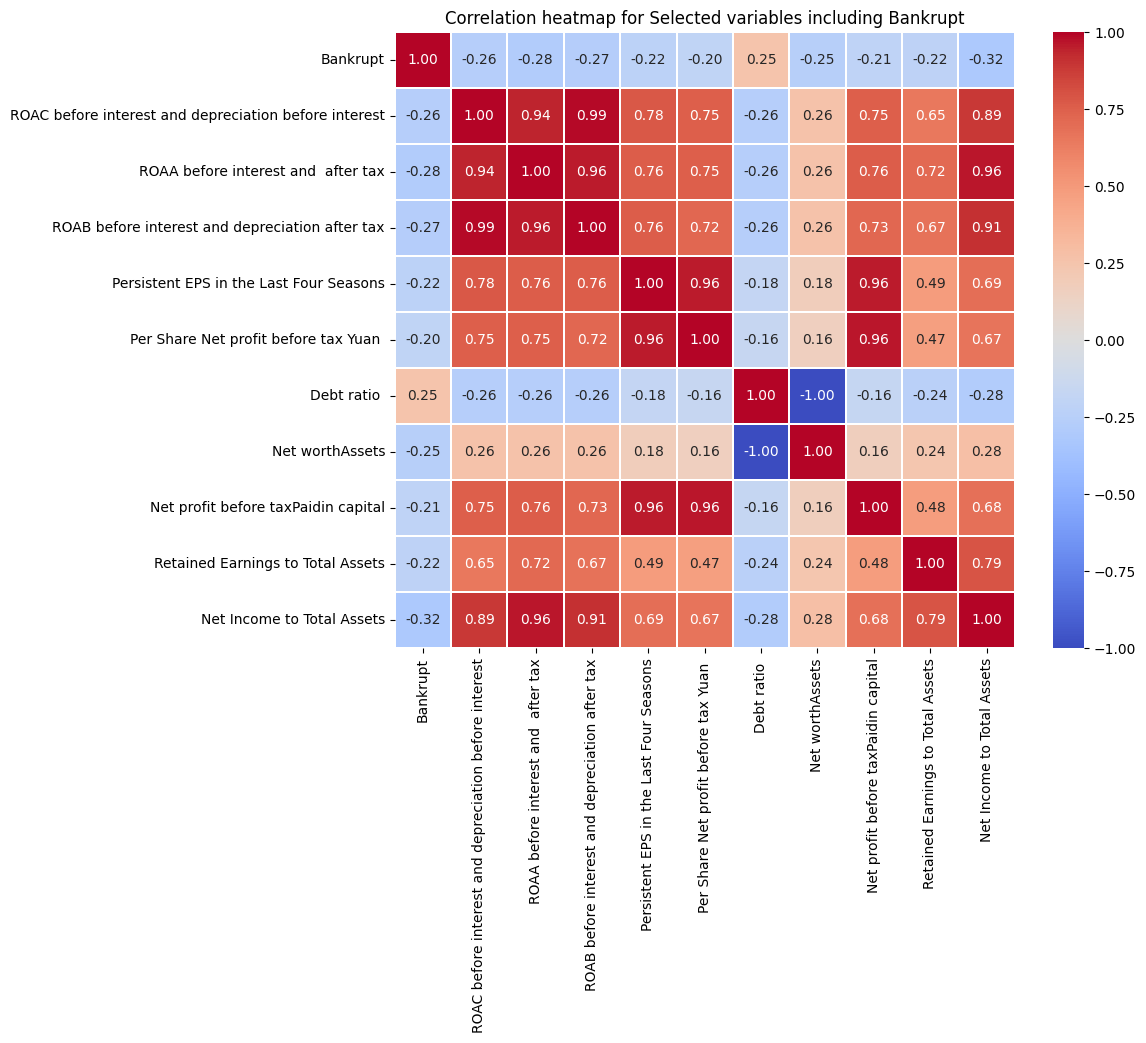

In [23]:
# Select variables with highest absolute correlation with Bankrupt and above threshold 0.2

corr_threshold = 0.2
selected_var = corr_matrix['Bankrupt'][abs(corr_matrix['Bankrupt']) > corr_threshold].index

# Create correlation matrix for the selected variables including Bankrupt
selected_corr_matrix = data[selected_var].corr()

# Create heatmap for selected correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Correlation heatmap for Selected variables including Bankrupt')
plt.show()

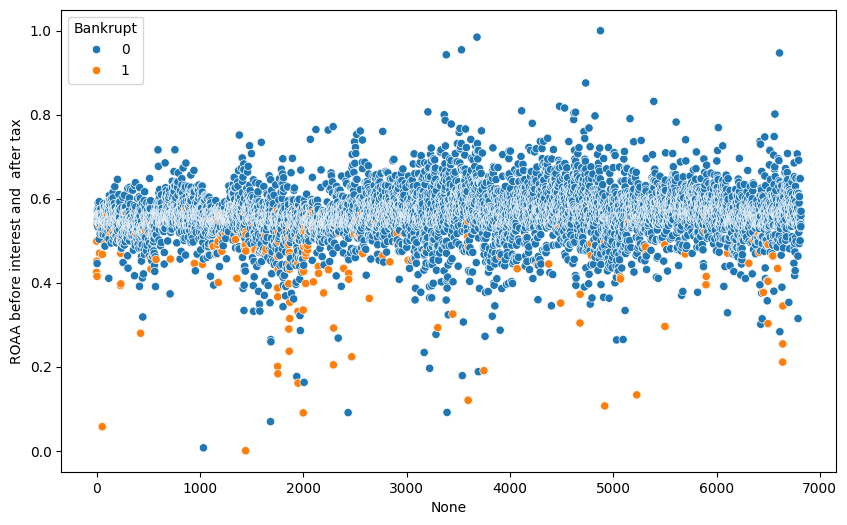

In [24]:
# Scatter plot for ROAA before interest and  after tax

fig = plt.figure(figsize = (10,6))
sns.scatterplot(x=data.index, y="ROAA before interest and  after tax", hue = "Bankrupt", data=data)
plt.show()

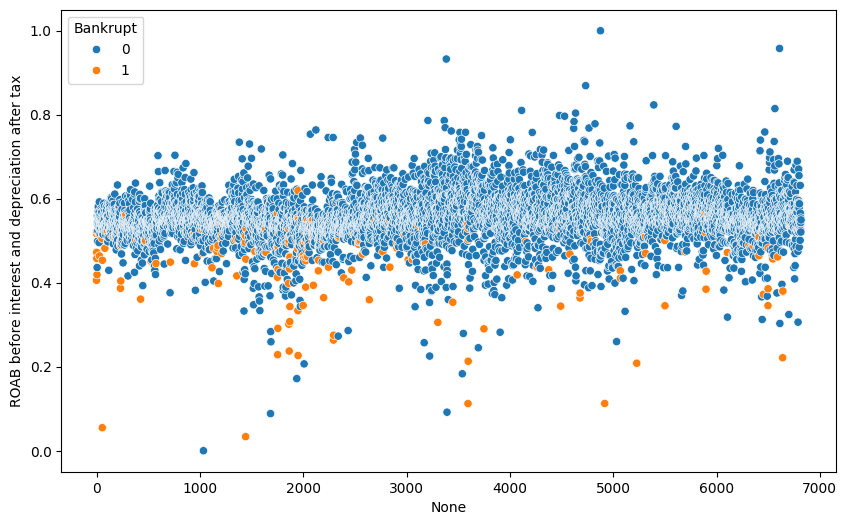

In [25]:
# scatter plot for ROAB before interest and depreciation after tax
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x=data.index, y="ROAB before interest and depreciation after tax", hue = "Bankrupt", data=data)
plt.show()

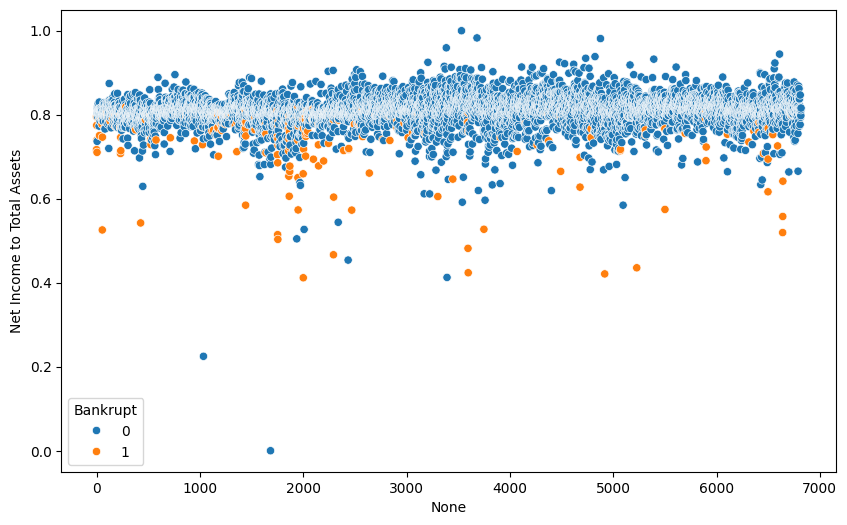

In [26]:
# scatter plot for Net Income to Total Assets
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x=data.index, y="Net Income to Total Assets", hue = "Bankrupt", data=data)
plt.show()

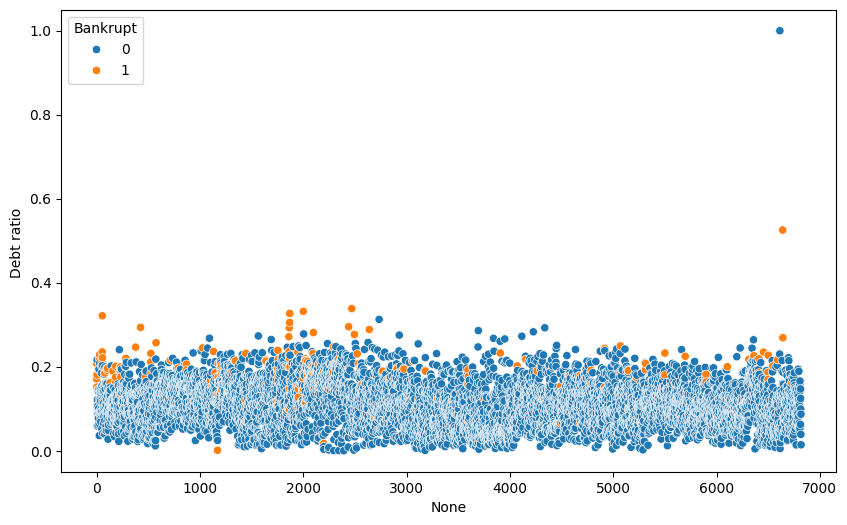

In [27]:
# scatter plot for Debt ratio
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x=data.index, y="Debt ratio ", hue = "Bankrupt", data=data)
plt.show()

In [28]:
# Creating the new DataFrame 'financial_data' with the selected columns
financial_data = data[
['ROAC before interest and depreciation before interest',
'ROAA before interest and  after tax',
'ROAB before interest and depreciation after tax',
'Persistent EPS in the Last Four Seasons',
'Per Share Net profit before tax Yuan ',
'Debt ratio ',
'Net worthAssets',
'Net profit before taxPaidin capital',
'Retained Earnings to Total Assets',
'Net Income to Total Assets',
'Bankrupt']
].copy()

# print the first few rows of the new DataFrame
financial_data.head()

,ROAC before interest and depreciation before interest,ROAA before interest and after tax,ROAB before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax Yuan,Debt ratio,Net worthAssets,Net profit before taxPaidin capital,Retained Earnings to Total Assets,Net Income to Total Assets,Bankrupt
0,0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845,1
1,0.464291,0.538214,0.516730,0.208944,0.169918,0.171176,0.828824,0.168962,0.931065,0.795297,1
2,0.426071,0.499019,0.472295,0.180581,0.142803,0.207516,0.792484,0.148036,0.909903,0.774670,1
3,0.399844,0.451265,0.457733,0.193722,0.148603,0.151465,0.848535,0.147561,0.906902,0.739555,1
4,0.465022,0.538432,0.522298,0.212537,0.168412,0.106509,0.893491,0.167461,0.913850,0.795016,1


In [29]:
financial_data.describe()

,ROAC before interest and depreciation before interest,ROAA before interest and after tax,ROAB before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax Yuan,Debt ratio,Net worthAssets,Net profit before taxPaidin capital,Retained Earnings to Total Assets,Net Income to Total Assets,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.228813,0.184361,0.113177,0.886823,0.182715,0.934733,0.807760,0.032263
std,0.060686,0.065620,0.061595,0.033263,0.033180,0.053920,0.053920,0.030785,0.025564,0.040332,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.214711,0.170370,0.072891,0.851196,0.169376,0.931097,0.796750,0.000000
50%,0.502706,0.559802,0.552278,0.224544,0.179709,0.111407,0.888593,0.178456,0.937672,0.810619,0.000000
75%,0.535563,0.589157,0.584105,0.238820,0.193493,0.148804,0.927109,0.191607,0.944811,0.826455,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


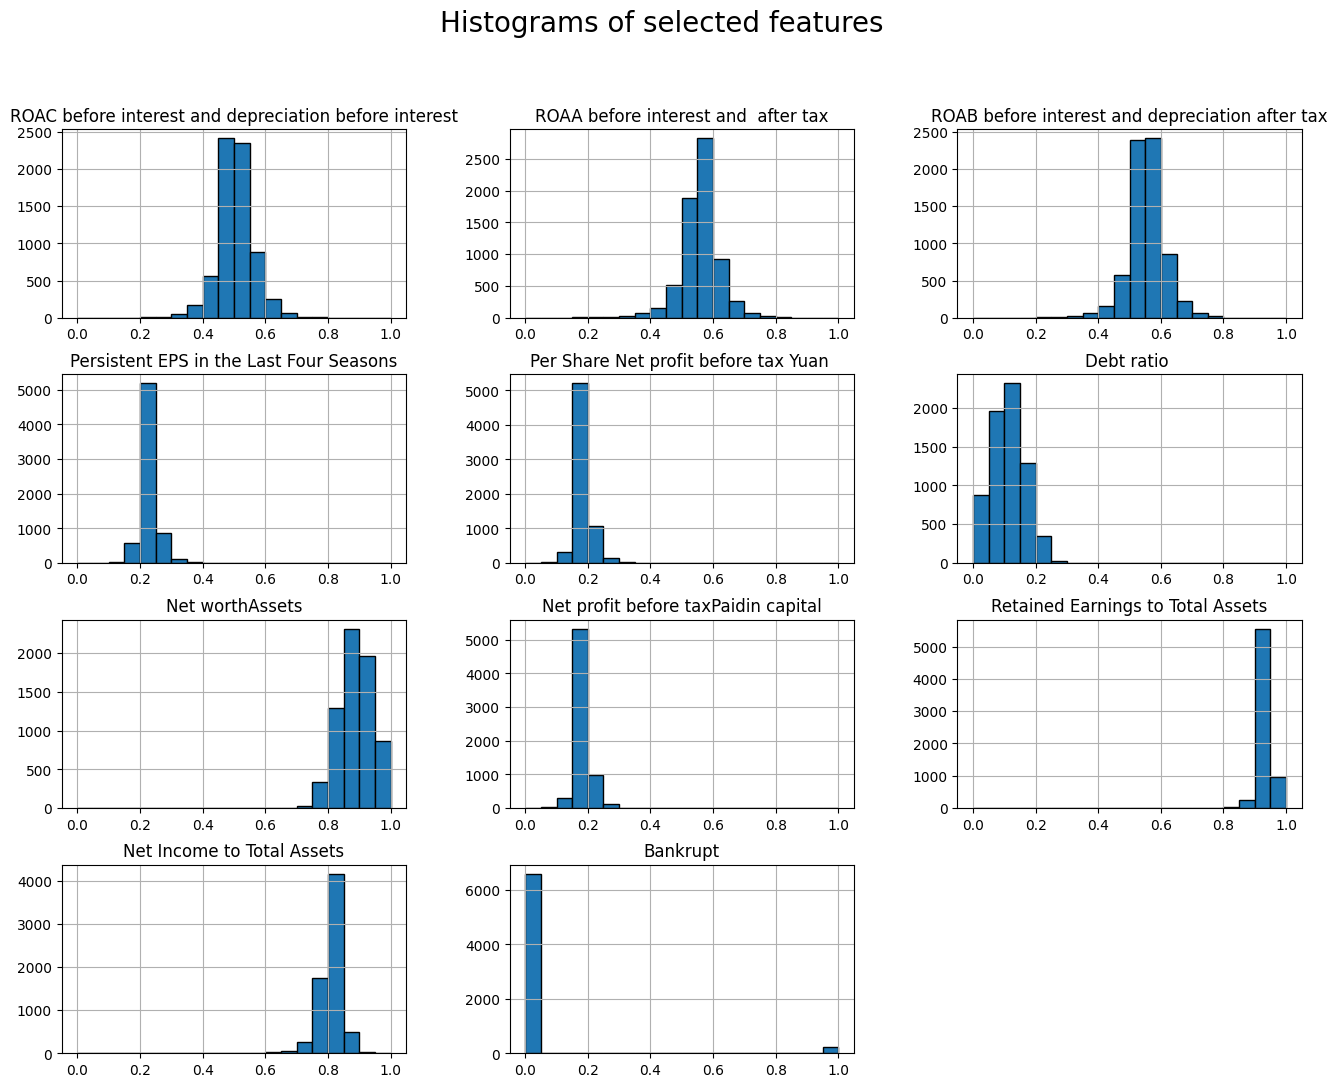

In [30]:
# Histograms of selected features
financial_data.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle('Histograms of selected features', fontsize=20)
plt.show()

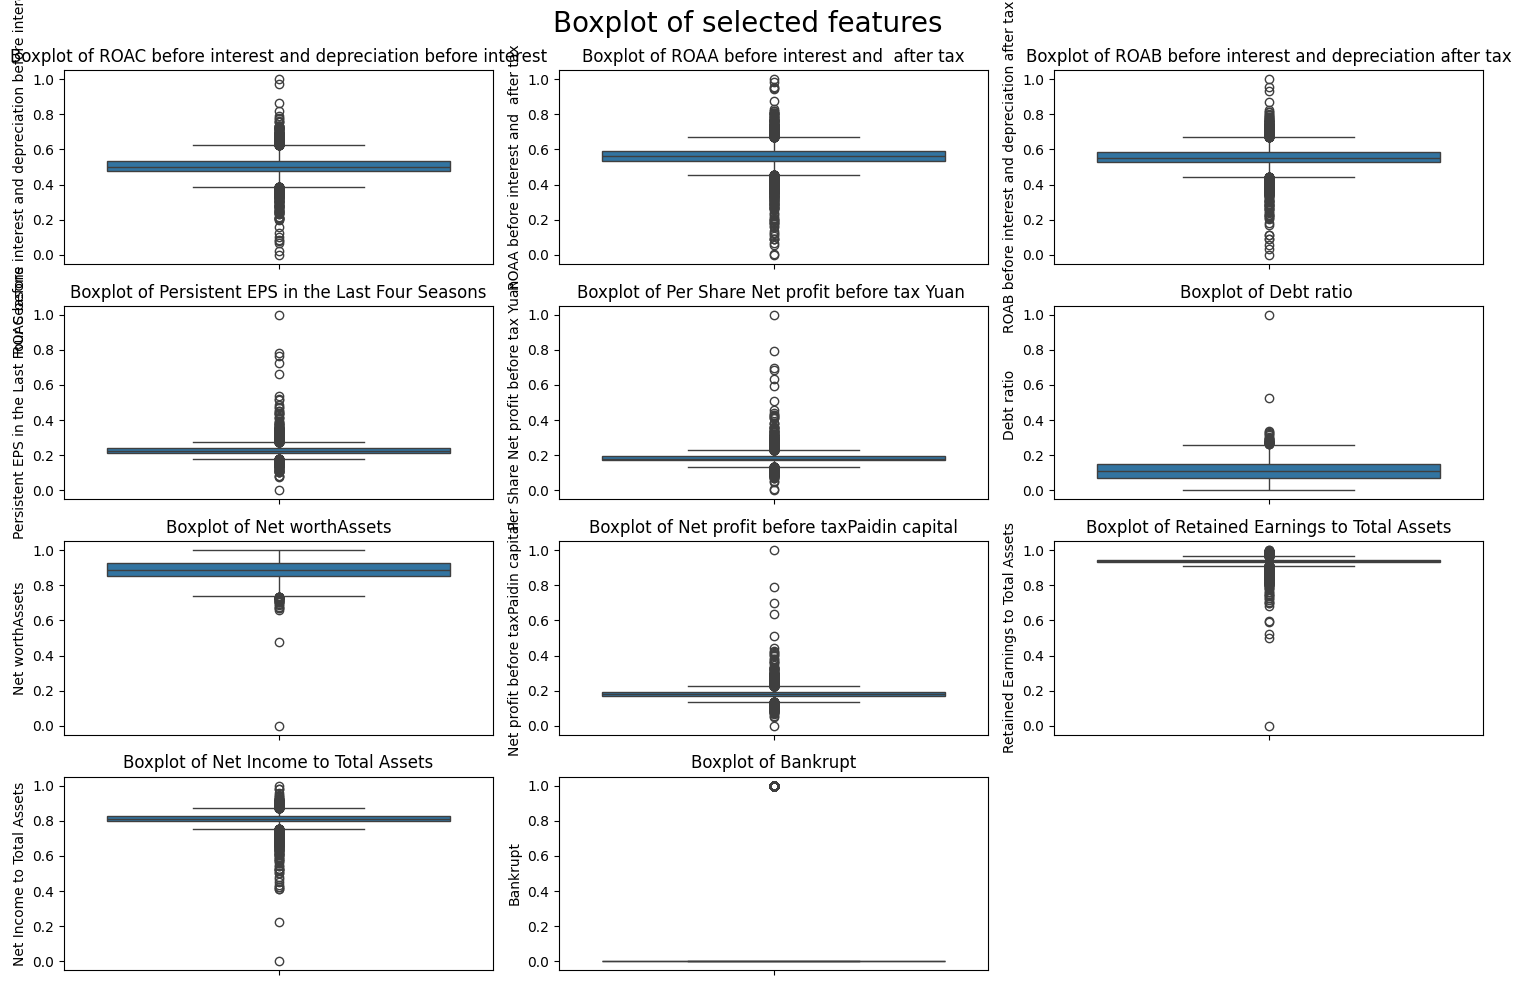

In [31]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(financial_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=financial_data[column])
    plt.title(f"Boxplot of {column}")
plt.suptitle('Boxplot of selected features', fontsize=20)
plt.tight_layout()
plt.show()


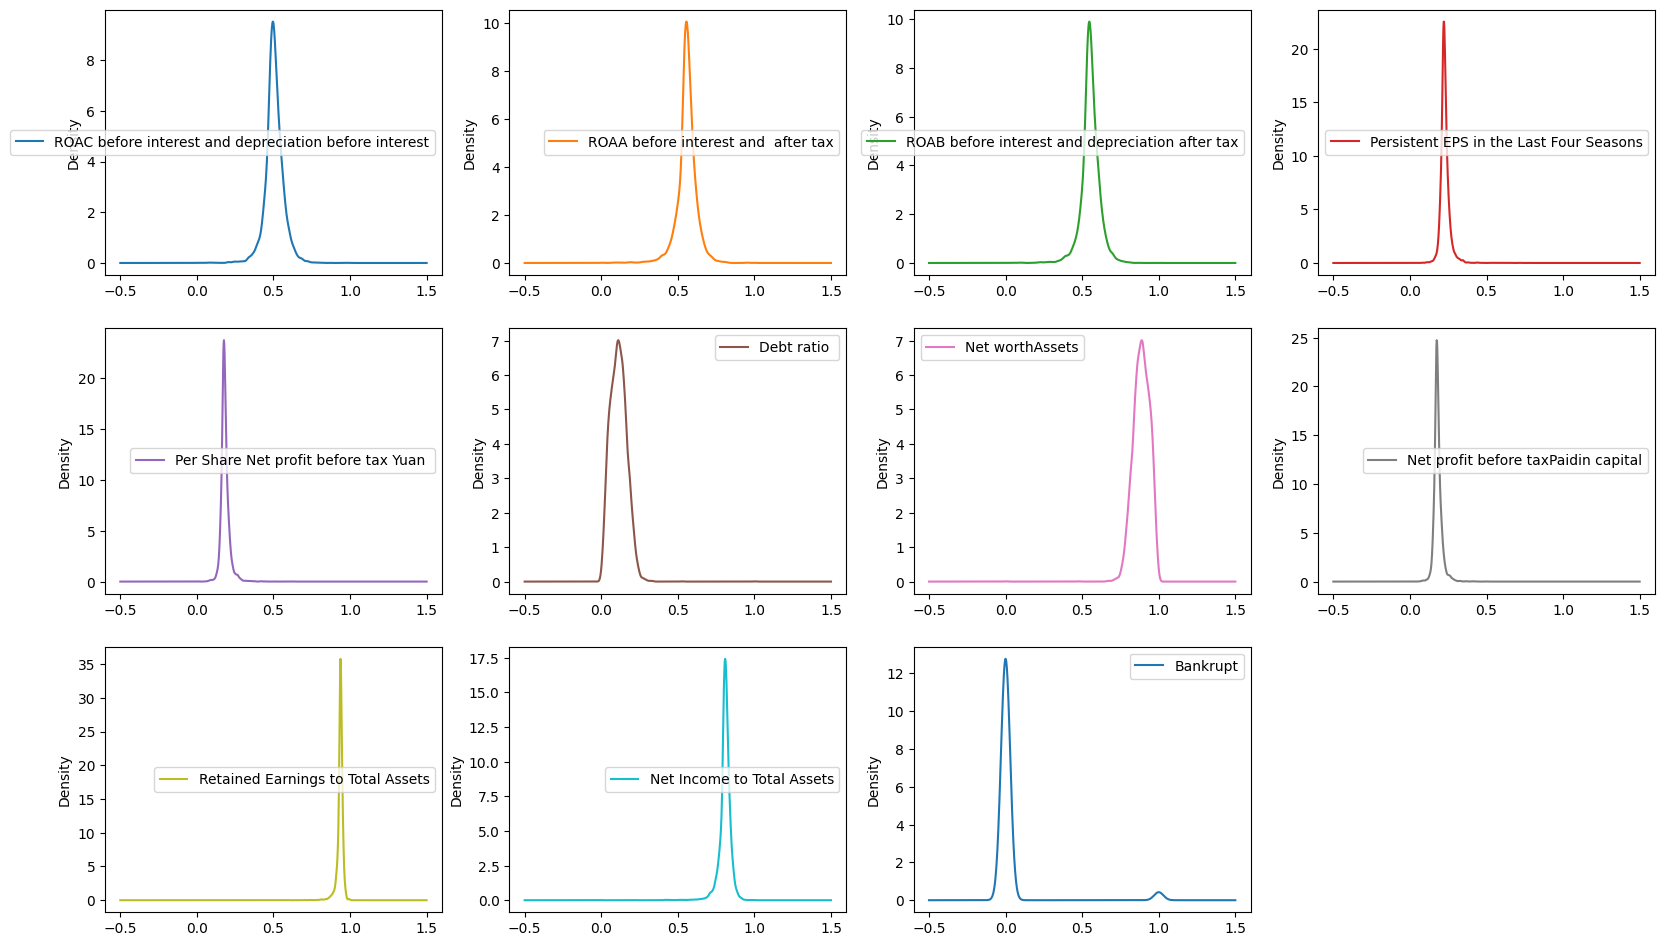

In [32]:
# kde plots
financial_data.plot(kind='density', subplots=True, layout=(5, 4),
        figsize=(20, 20), sharex=False)
plt.title("The KDE plots for the data attributes")
plt.show()

In [33]:
# Define feature variables (X) and traget variable (y)
X = financial_data.drop(columns=['Bankrupt'])
y = financial_data['Bankrupt']

In [34]:
X

,ROAC before interest and depreciation before interest,ROAA before interest and after tax,ROAB before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax Yuan,Debt ratio,Net worthAssets,Net profit before taxPaidin capital,Retained Earnings to Total Assets,Net Income to Total Assets
0,0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845
1,0.464291,0.538214,0.516730,0.208944,0.169918,0.171176,0.828824,0.168962,0.931065,0.795297
2,0.426071,0.499019,0.472295,0.180581,0.142803,0.207516,0.792484,0.148036,0.909903,0.774670
3,0.399844,0.451265,0.457733,0.193722,0.148603,0.151465,0.848535,0.147561,0.906902,0.739555
4,0.465022,0.538432,0.522298,0.212537,0.168412,0.106509,0.893491,0.167461,0.913850,0.795016
...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.216602,0.172102,0.124618,0.875382,0.171111,0.925611,0.799927
6815,0.475162,0.538269,0.524172,0.216697,0.172780,0.099253,0.900747,0.171805,0.932629,0.799748
6816,0.472725,0.533744,0.520638,0.210929,0.173232,0.038939,0.961061,0.172287,0.932000,0.797778
6817,0.506264,0.559911,0.554045,0.228326,0.185584,0.086979,0.913021,0.182498,0.939613,0.811808


In [35]:
y

,Bankrupt
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


# Split the data into trainig and testing sets

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(5455, 10)

In [38]:
# balancing the data using smote
from imblearn.over_sampling import SMOTE

# Assuming you have your data in X (features) and y (target labels)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [39]:
# Standardize the features (Z-score normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[ 0.42590243,  0.32526045,  0.39464834, ...,  0.25892465,
         0.59035087,  0.37750373],
       [ 0.52419308,  0.52055048,  0.5542703 , ...,  0.30204419,
         0.52332518,  0.51506227],
       [ 0.55083814,  0.50742174,  0.50746386, ...,  0.50187777,
         0.70737488,  0.49825345],
       ...,
       [-1.21695533, -1.04083991, -1.16695531, ..., -1.61443451,
        -0.60894081, -0.93219563],
       [-0.52295176, -0.35719275, -0.44813413, ..., -0.32563111,
        -0.00977706, -0.1811277 ],
       [-0.45335396, -0.34913112, -0.42393929, ..., -0.63095701,
        -0.09339712, -0.28168667]])

In [41]:
X_test_scaled

array([[-0.35213324, -0.29288445, -0.11962242, ..., -0.3227255 ,
         0.0412124 , -0.13798146],
       [ 0.96057991,  0.61190464,  0.91071934, ...,  0.6486233 ,
         0.78659175,  0.61369478],
       [ 1.47512557,  1.21418564,  1.20656004, ...,  1.07216847,
         0.86179867,  1.03952898],
       ...,
       [ 0.29563771,  0.26180487,  0.37124512, ...,  0.09224213,
         0.32976371,  0.31028666],
       [-0.17449952,  0.04080439, -0.10702068, ..., -0.22373602,
         0.27091927,  0.18329168],
       [ 1.07308126,  0.96747471,  1.16755467, ...,  0.80835106,
         0.78838563,  0.91287537]])

# Model Building

#### 1st Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Train a RandomForest classifier on the resampled and scaled data

# Step 1: Initialize the model
rf_clf = RandomForestClassifier(random_state=42)
# Step 2: Train the model
rf_clf.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 3: Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test_scaled)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
 [[1248   65]
 [  21   30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1313
           1       0.32      0.59      0.41        51

    accuracy                           0.94      1364
   macro avg       0.65      0.77      0.69      1364
weighted avg       0.96      0.94      0.95      1364


Accuracy Score: 0.9369501466275659


#### 2nd Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
# Train a Logistic Regression on the resampled and scaled data

# Step 1: Initialize the model
log_reg = LogisticRegression(random_state=42)
# Step 2: Train the model
log_reg.fit(X_train_scaled, y_train_resampled)

LogisticRegression(random_state=42)

In [45]:
# Step 3: Make predictions on the test set
y_pred_lr = log_reg.predict(X_test_scaled)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_lr)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
 [[1127  186]
 [   8   43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.19      0.84      0.31        51

    accuracy                           0.86      1364
   macro avg       0.59      0.85      0.61      1364
weighted avg       0.96      0.86      0.90      1364


Accuracy Score: 0.8577712609970675


#### 3rd SVM

In [46]:
from sklearn.svm import SVC
# Train a SVM on the resampled and scaled data

# Step 1: Initialize the model
svm = SVC(random_state=42)
# Step 2: Train the model
svm.fit(X_train_scaled, y_train_resampled)

SVC(random_state=42)

In [47]:
# Step 3: Make predictions on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_svm)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1109  204]
 [   9   42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      1313
           1       0.17      0.82      0.28        51

    accuracy                           0.84      1364
   macro avg       0.58      0.83      0.60      1364
weighted avg       0.96      0.84      0.89      1364


Accuracy Score: 0.843841642228739


#### 4th DecisionTree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
# Train a DecisionTreeClassifier on the resampled and scaled data

# Step 1: Initialize the model
dtc = DecisionTreeClassifier(random_state=42)
# Step 2: Trian the model
dtc.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [49]:
# Step 3: Make predictions on the test set
y_pred_dtc = dtc.predict(X_test_scaled)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtc))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_dtc)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1215   98]
 [  25   26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1313
           1       0.21      0.51      0.30        51

    accuracy                           0.91      1364
   macro avg       0.59      0.72      0.62      1364
weighted avg       0.95      0.91      0.93      1364


Accuracy Score: 0.9098240469208211


#### 5th SGDClassifier

In [50]:
from sklearn.linear_model import SGDClassifier
# Train a SGDClassifier on the resampled and scaled data

# Step 1: Initialize the model
sgd = SGDClassifier(random_state=42)
# Step 2: Train the model
sgd.fit(X_train_scaled, y_train_resampled)

SGDClassifier(random_state=42)

In [51]:
# Step 3: Make predictions on the test set
y_pred_sgd = sgd.predict(X_test_scaled)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_sgd))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_sgd)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1153  160]
 [   7   44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.22      0.86      0.35        51

    accuracy                           0.88      1364
   macro avg       0.60      0.87      0.64      1364
weighted avg       0.96      0.88      0.91      1364


Accuracy Score: 0.8775659824046921


#### 6th XGboost

In [52]:
import xgboost as xgb
# Train a XGBClassifier on the resampled and scaled data

# Step 1: Initialize the model
model_xgb = xgb.XGBClassifier(random_state=42)
# Step 2: Train the model
model_xgb.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [53]:
# Step 3: Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_xgb)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1242   71]
 [  21   30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1313
           1       0.30      0.59      0.39        51

    accuracy                           0.93      1364
   macro avg       0.64      0.77      0.68      1364
weighted avg       0.96      0.93      0.94      1364


Accuracy Score: 0.9325513196480938


#### Model Comparison

In [54]:
results = {
    'Random Forest': [accuracy_score(y_test,y_pred_rf)],
    'Logistic Regression': [accuracy_score(y_test,y_pred_lr)],
    'SVM':[accuracy_score(y_test,y_pred_svm)],
    'DecisionTree Classifier':[accuracy_score(y_test,y_pred_dtc)],
    'SGDClassifier':[accuracy_score(y_test,y_pred_sgd)],
    'XGBoost':[accuracy_score(y_test,y_pred_xgb)]
}

for model, scores in results.items():
    print(f"{model} - Accuracy: {scores[0]:.6f}")

Random Forest - Accuracy: 0.936950
Logistic Regression - Accuracy: 0.857771
SVM - Accuracy: 0.843842
DecisionTree Classifier - Accuracy: 0.909824
SGDClassifier - Accuracy: 0.877566
XGBoost - Accuracy: 0.932551
